In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount("/content/gdrive")
df = pd.read_csv('/content/gdrive/My Drive/data/tweets_raw.csv')
df.head(10)

Mounted at /content/gdrive


,Unnamed: 0,Unnamed: 0.1,Content,Location,Username,Retweet-Count,Favorites,Created at
0,0,0,innovate an innovative approach #quoteoftheday...,NaN,PaulBillygraha1,0,0,2020-08-02 04:56:27
1,1,1,The pandemic is raising concerns about how tee...,Worldwide,IAM__Network,0,0,2020-08-02 04:49:43
2,2,2,STI: Staying Education-ready in the New Normal...,Worldwide,IAM__Network,0,0,2020-08-02 04:32:36
3,3,3,Digital Learning Through Digital RCRT\n.\n.\nR...,NaN,digitalrcrt,0,0,2020-08-02 04:30:12
4,4,4,"Upswing Classroom: Out and Out Virtual School,...",India,etr_in,1,0,2020-08-02 04:00:21
5,5,5,A digital future needs a workforce conversant ...,"City of London, London",RPInsight,0,0,2020-08-02 03:00:03
6,6,6,The JH Educational Technology (HKG:1935) Share...,Worldwide,IAM__Network,0,0,2020-08-02 02:34:53
7,7,7,Anaheim public schools launch virtual academie...,Worldwide,IAM__Network,0,1,2020-08-02 01:34:46
8,8,8,New Oriental Education &amp; Technology Group ...,Worldwide,IAM__Network,0,0,2020-08-02 00:50:45
9,9,9,“Instructional Considerations for the 2020-21 ...,"Illinois, USA",Erik_Youngman,0,2,2020-08-02 00:10:26


#Cleansing and Preprocessing
**Under data preprocessing and cleansing we dropped missing values, check whether outliers are lie in numerical data and drop duplicated data points. Since we are mostly working on catergorical data we no need to do transformation, feature scaling, feature discretization on numeriacal data.**

In [ ]:
copy = df.copy()
copy.isnull().values.any()

True

In [ ]:
len(copy.index) #No. of rows before dropping missing values

202645

In [ ]:
new_data = copy.dropna() #drop missing values
new_data.isnull().values.any()

False

In [ ]:
# Print the info again
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155123 entries, 1 to 202643
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     155123 non-null  int64 
 1   Unnamed: 0.1   155123 non-null  int64 
 2   Content        155123 non-null  object
 3   Location       155123 non-null  object
 4   Username       155123 non-null  object
 5   Retweet-Count  155123 non-null  int64 
 6   Favorites      155123 non-null  int64 
 7   Created at     155123 non-null  object
dtypes: int64(4), object(4)
memory usage: 10.7+ MB
None


In [ ]:
# We do not need first two columns. Let's drop them out.
new_data.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Print the info again
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155123 entries, 1 to 202643
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Content        155123 non-null  object
 1   Location       155123 non-null  object
 2   Username       155123 non-null  object
 3   Retweet-Count  155123 non-null  int64 
 4   Favorites      155123 non-null  int64 
 5   Created at     155123 non-null  object
dtypes: int64(2), object(4)
memory usage: 8.3+ MB
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f796bc70710>,
      dtype=object)

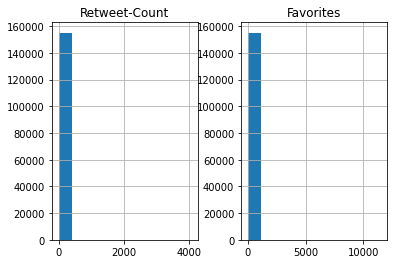

In [ ]:
new_data.hist()

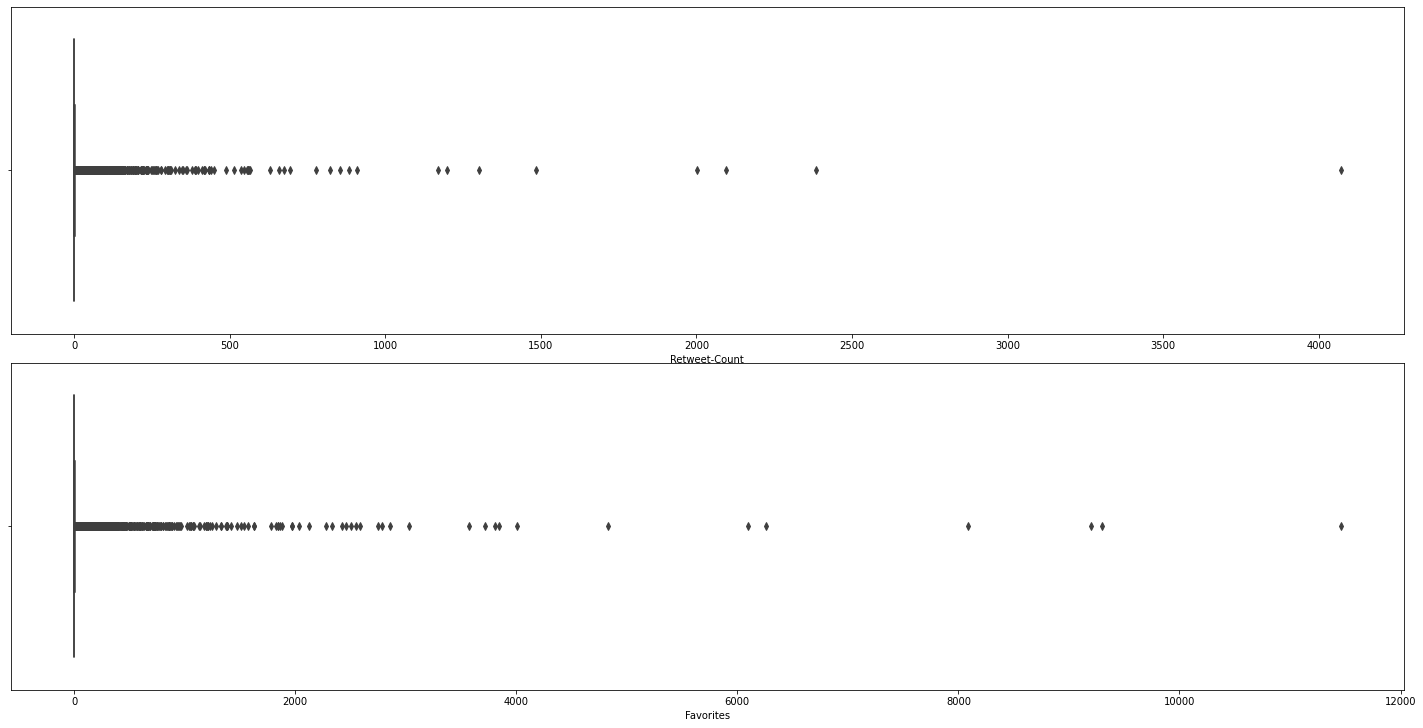

In [ ]:
# check outliers
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# draw boxplots for all features
fig, axes = plt.subplots(2,figsize=(20,10))
plt.tight_layout(0.8)
sns.boxplot(new_data['Retweet-Count'],orient = 'v',ax = axes[0])
sns.boxplot(new_data['Favorites'],orient = 'v',ax = axes[1])
plt.show()

In [ ]:
# Drop duplicated rows
new_data.drop_duplicates(inplace=True)

In [ ]:
# Created at column's type should be datatime
new_data["Created at"] = pd.to_datetime(new_data["Created at"])

In [ ]:
# Print the info again
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142803 entries, 1 to 202639
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Content        142803 non-null  object        
 1   Location       142803 non-null  object        
 2   Username       142803 non-null  object        
 3   Retweet-Count  142803 non-null  int64         
 4   Favorites      142803 non-null  int64         
 5   Created at     142803 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 7.6+ MB
None


**In the following code fragment we remove links, hashtags and by using tokenizer we split the sentence into word and punctuation marks and then we remove words like prepositions which are not contributing to the meaning of a sentence using stopwords. Then we lemmatize words into there original form. As an example the lemma of words running runs, and ran is run**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import re

# Import word_tokenize and stopwords from nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def process_tweets(tweet):
    
    # Remove links
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Tokenize the words
    tokenized = word_tokenize(tweet)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    
    return tokenized
    
# Call the function and store the result into a new column
new_data["Processed"] = new_data["Content"].str.lower().apply(process_tweets)

# Print the first fifteen rows of Processed
display(new_data[["Processed"]].head(15))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Processed
1,"[pandemic, raising, concerns, teens, use, tech..."
2,"[sti, staying, new, normal, inquirer, technolo..."
4,"[upswing, classroom, virtual, school, classroo..."
5,"[digital, future, needs, workforce, conversant..."
6,"[educational, technology, share, price, shareh..."
7,"[anaheim, public, schools, launch, virtual, ac..."
8,"[new, oriental, education, amp, technology, gr..."
9,"[instructional, considerations, school, year, ..."
10,"[uncertainty, september, bring, created, donor..."
11,"[check, wakelet, digital, learning, tools, via..."


**Here we have created new two columns which give lenth and the word conunt of content column in each an every datapoint**

In [ ]:
# Get the tweet lengths
new_data["Length"] = new_data["Content"].str.len()
# Get the number of words in tweets
new_data["Words"] = new_data["Content"].str.split().str.len()
# Display the new columns
display(new_data[["Length", "Words"]])

,Length,Words
1,300,32
2,265,24
4,213,24
5,279,37
6,291,29
...,...,...
202634,84,9
202635,277,35
202636,277,35
202637,253,32


In [ ]:
# Print the unique locations and number of unique locations
print("Unique Values:",new_data["Location"].unique())
print("Unique Value count:",len(new_data["Location"].unique()))

Unique Values: ['Worldwide' 'India' 'City of London, London' ...
 'San Francisco - Daly City' '14041 Alief Clodine Rd'
 'Washington, DC Area']
Unique Value count: 37119


pycountry provides the ISO databases for the standards: 639 - Languages,
3166 - Countries, 3166-3 - Deleted countries,3166-2 - Subdivisions of countries,
4217 - Currencies,15924 - Scripts

The package includes a copy from Debian’s pkg-isocodes and makes the data accessible through a Python API. 

In [ ]:
!pip install pycountry

     |████████████████████████████████| 10.1MB 4.1MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=d239601d76044f5ef4c51c03b5fac889fa7f5297d4a787da7e18f6c6243d7c28
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [ ]:
# Import pycountry
import pycountry

def get_countries(location):
    
    # If location is a country name return its alpha2 code
    if pycountry.countries.get(name= location):
        return pycountry.countries.get(name = location).alpha_2
    
    # If location is a subdivisions name return the countries alpha2 code
    try:
        pycountry.subdivisions.lookup(location)
        return pycountry.subdivisions.lookup(location).country_code
    except:
        # If the location is neither country nor subdivision return the "unknown" tag
        return "unknown"

# Call the function and store the country codes in the Country column
new_data["Country"] = new_data["Location"].apply(get_countries)

# Print the unique values
print(new_data["Country"].unique())

# Print the number of unique values
print("Number of unique values:",len(new_data["Country"].unique()))

['unknown' 'IN' 'ES' 'US' 'GB' 'ZM' 'GH' 'FI' 'ZA' 'SG' 'NP' 'FR' 'MC'
 'BD' 'IL' 'LR' 'NG' 'CA' 'GE' 'PK' 'DK' 'AE' 'LU' 'SE' 'LB' 'AU' 'QA'
 'VI' 'IE' 'JM' 'DE' 'HK' 'TH' 'MY' 'PH' 'AG' 'UG' 'BS' 'DO' 'GI' 'IQ'
 'BE' 'NZ' 'MX' 'KH' 'TR' 'LK' 'CO' 'EG' 'KE' 'NI' 'IT' 'GD' 'GT' 'BG'
 'PT' 'CH' 'SA' 'NL' 'HU' 'HR' 'HN' 'ZW' 'GR' 'CR' 'AR' 'KW' 'SL' 'NO'
 'MT' 'NA' 'CM' 'HT' 'CN' 'GU' 'UZ' 'TC' 'ID' 'BW' 'AT' 'TT' 'CY' 'BH'
 'KG' 'NR' 'BT' 'BR' 'BN' 'CU' 'AW' 'UA' 'MW' 'MN' 'SV' 'OM' 'BF' 'SI'
 'KN' 'EC' 'PA' 'EE' 'MA' 'JP' 'RW' 'BB' 'PE' 'CW' 'RO' 'AZ' 'LS' 'PR'
 'PL' 'CL' 'UY' 'JO' 'AF' 'PS' 'SK' 'BM' 'GN' 'GQ' 'MV' 'TW' 'PY' 'CG'
 'GG' 'AL' 'AQ' 'MP' 'CZ' 'ET' 'BJ' 'JE' 'KZ' 'NC' 'GM' 'SC' 'VC' 'AM'
 'DZ' 'SM' 'LV' 'YE' 'GY' 'CI' 'PG' 'MK' 'BZ' 'ME' 'MU' 'IS' 'LY' 'LC'
 'BA' 'SN' 'IM']
Number of unique values: 156


**Tf-idf (Term Frequency — Inverse Term Frequency) is a statistical concept to be used to get the frequency of words in the corpus. We’ll use scikit-learn’s TfidfVectorizer. The vectorizer will calculate the weight of each word in the corpus and will return a tf-idf matrix.**

In [ ]:
# Import TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Create our contextual stop words
tfidf_stops = ["online","class","course","learning","learn",
"teach","teaching","distance","distancelearning","education",
"teacher","student","grade","classes","computer","onlineeducation", 
"onlinelearning", "school", "students","class","virtual","eschool", 
"virtuallearning", "educated", "educates", "teaches", "studies",
"study", "semester", "elearning","teachers", "lecturer", "lecture",
"amp","academic", "admission", "academician", "account", "action" 
"add", "app", "announcement", "application", "adult", "classroom", 
"system", "video", "essay", "homework","work","assignment","paper", 
"get", "math", "project", "science", "physics", "lesson","courses", 
"assignments", "know", "instruction","email", "discussion","home",
"college","exam""use","fall","term","proposal","one","review",
"proposal", "calculus", "search", "research", "algebra"]

# Initialize a Tf-idf Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words= tfidf_stops)

# Change the datatype as "unicode"
tweets_processed["Processed"] = tweets_processed["Processed"].astype("U")

# Fit and transform the vectorizer
tfidf_matrix = vectorizer.fit_transform(tweets_processed["Processed"])

# Let's see what we have
display(tfidf_matrix)

# Create a DataFrame for tf-idf vectors and display the first rows
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns= vectorizer.get_feature_names())
display(tfidf_df.head())

NameError: ignored

In [ ]:
# Save the processed data as a csv file
new_data.to_csv("tweets_processed.csv")

# Exploratory Data Analysis

In [ ]:
# Load the processed DataFrame
tweets_processed = pd.read_csv("tweets_processed.csv", parse_dates=["Created at"])

In [ ]:
# Print the minimum datetime
print("Since:",tweets_processed["Created at"].astype('str').min())

# Print the maximum datetime
print("Until",tweets_processed["Created at"].astype('str').max())

Since: 2020-07-23 23:51:34
Until nan


In [ ]:
!pip install seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


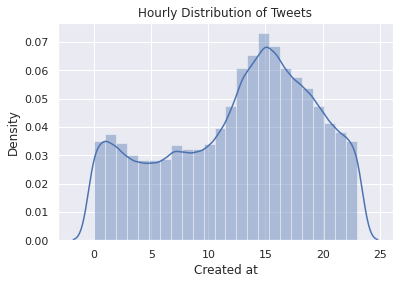

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the seaborn style
sns.set()
# Plot the histogram of hours
tweets_processed["Created at"] = pd.to_datetime(tweets_processed["Created at"],format = "%Y-%m-%d %H:%M:%S",errors ='coerce')
sns.distplot(tweets_processed["Created at"].dt.hour, bins=24)
plt.title("Hourly Distribution of Tweets")
plt.show()

In [ ]:
# Print the value counts of Country column
print(tweets_processed["Country"].value_counts())

unknown    125481
US           6259
GB           2133
IN           1725
ZA           1416
            ...  
AM              1
TC              1
CI              1
ME              1
MU              1
Name: Country, Length: 155, dtype: int64


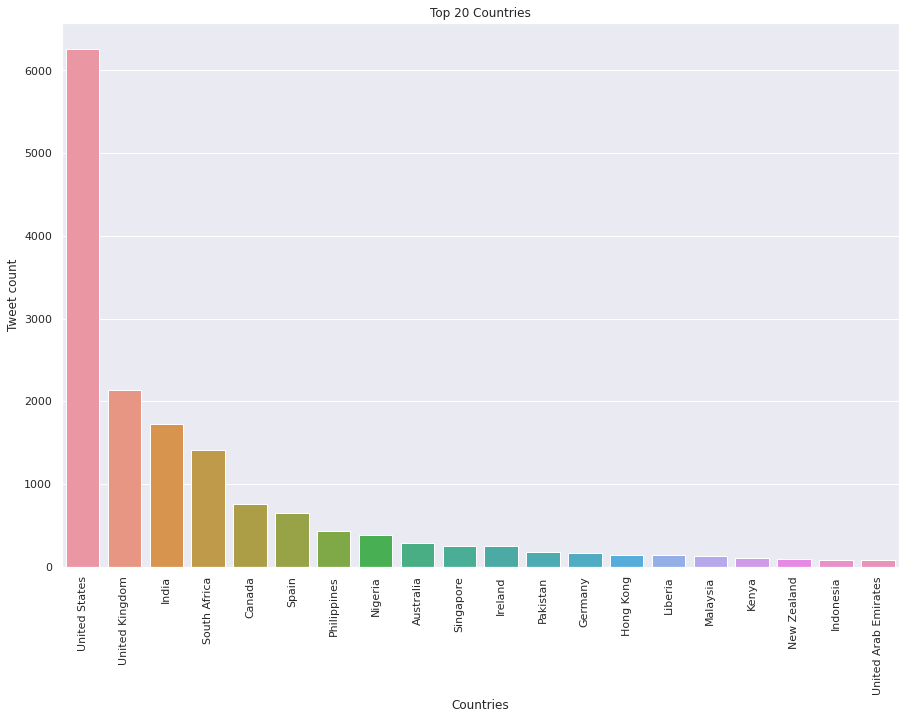

In [ ]:
# We need to exclude unknowns
countries = tweets_processed[tweets_processed.Country!='unknown']

# Select the top 20 countries
top_countries = countries["Country"].value_counts(sort=True).head(20)

# Convert alpha2 country codes to country names and store in a list
country_fullnames = []
for alpha2 in top_countries.index:
    country_fullnames.append(pycountry.countries.get(alpha_2=alpha2).name)

# Visualize the top 20 countries
plt.figure(figsize=(15,10))
sns.barplot(x=country_fullnames,y=top_countries)
plt.xlabel("Countries")
plt.ylabel("Tweet count")
plt.title("Top 20 Countries")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Display the most popular tweets
display(tweets_processed.sort_values(by=["Favorites","Retweet-Count", ], axis=0, ascending=False)[["Content","Retweet-Count","Favorites"]].head(20))

,Content,Retweet-Count,Favorites
24804,Ther wl also b a greater focus on e-learning w...,152.0,99
121073,"""OU is marching us headfirst into catastrophe....",32.0,99
99192,BREAKING: Education commissioner says Hillsbor...,19.0,99
50627,"It was also on ""The Everygirl's (influential o...",18.0,99
83838,Today I completed my first online course on Sp...,16.0,99
83548,I have a small ninja warrior course in my back...,6.0,99
2352,Look who is back in studio!! Yay! Hally is her...,5.0,99
93746,Online classes not substitute for school educa...,5.0,99
8964,“As we approach a new school year filled with ...,39.0,98
62899,there’s an online concert but you have classes...,30.0,98


In [ ]:
tweets_processed.head()

,Unnamed: 0,Content,Location,Username,Retweet-Count,Favorites,Created at,Processed,Length,Words,Country
0,1,The pandemic is raising concerns about how tee...,Worldwide,IAM__Network,0.0,0,2020-08-02 04:49:43,"['pandemic', 'raising', 'concerns', 'teens', '...",300.0,32,unknown
1,2,STI: Staying Education-ready in the New Normal...,Worldwide,IAM__Network,0.0,0,2020-08-02 04:32:36,"['sti', 'staying', 'new', 'normal', 'inquirer'...",265.0,24,unknown
2,4,"Upswing Classroom: Out and Out Virtual School,...",India,etr_in,1.0,0,2020-08-02 04:00:21,"['upswing', 'classroom', 'virtual', 'school', ...",213.0,24,IN
3,5,A digital future needs a workforce conversant ...,"City of London, London",RPInsight,0.0,0,2020-08-02 03:00:03,"['digital', 'future', 'needs', 'workforce', 'c...",279.0,37,unknown
4,6,The JH Educational Technology (HKG:1935) Share...,Worldwide,IAM__Network,0.0,0,2020-08-02 02:34:53,"['educational', 'technology', 'share', 'price'...",291.0,29,unknown


In [ ]:
# Create a new DataFrame called frequencies
frequencies = pd.DataFrame(tfidf_matrix.sum(axis=0).T,index=vectorizer.get_feature_names(),columns=['total frequency'])

# Sort the words by frequency
frequencies.sort_values(by='total frequency',ascending=False, inplace=True)
# Display the most 20 frequent words
display(frequencies.head(20))

,total frequency
pay,2111.643998
help,1759.932666
new,1568.505825
like,1433.557095
free,1420.808318
time,1360.459603
first,1328.710619
need,1318.287222
day,1314.427396
year,1302.439747


# Sentiment Analysis

**The sentiment function of textblob returns two properties, polarity, and subjectivity.**

**Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].**

In [ ]:
!pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)


In [ ]:
from textblob import TextBlob
# Change the datatype as "string"
tweets_processed["Processed"] = tweets_processed["Processed"].astype("str")

# Add polarities and subjectivities into the DataFrame by using TextBlob
tweets_processed["Polarity"] = tweets_processed["Processed"].apply(lambda word: TextBlob(word).sentiment.polarity)
tweets_processed["Subjectivity"] = tweets_processed["Processed"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

# Display the Polarity and Subjectivity columns
display(tweets_processed[["Polarity","Subjectivity"]].head(10))

,Polarity,Subjectivity
0,0.000000,0.000000
1,0.143182,0.552273
2,0.000000,0.000000
3,0.000000,0.041667
4,0.250000,0.250000
5,-0.025000,0.233333
6,0.136364,0.454545
7,0.000000,0.000000
8,0.175000,0.350000
9,0.000000,0.000000


**Here we created a function to build polarity column as categorical data.**

In [ ]:

# Define a function to classify polarities
def analyse_polarity(polarity):
    if polarity > 0:
        return "Positive"
    if polarity == 0:
        return "Neutral"
    if polarity < 0:
        return "Negative"

# Apply the funtion on Polarity column and add the results into a new column
tweets_processed["Polarity Scores"] = tweets_processed["Polarity"].apply(analyse_polarity)

# Display the Polarity and Subjectivity Analysis
display(tweets_processed[["Polarity Scores"]].head(10))

,Polarity Scores
0,Neutral
1,Positive
2,Neutral
3,Neutral
4,Positive
5,Negative
6,Positive
7,Neutral
8,Positive
9,Neutral


In [ ]:
# Print the value counts of the Label column
print(tweets_processed["Polarity Scores"].value_counts())

Positive    77617
Neutral     43369
Negative    21823
Name: Polarity Scores, dtype: int64


**Then we count labeled polarities**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


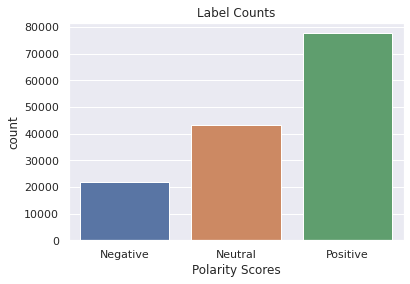

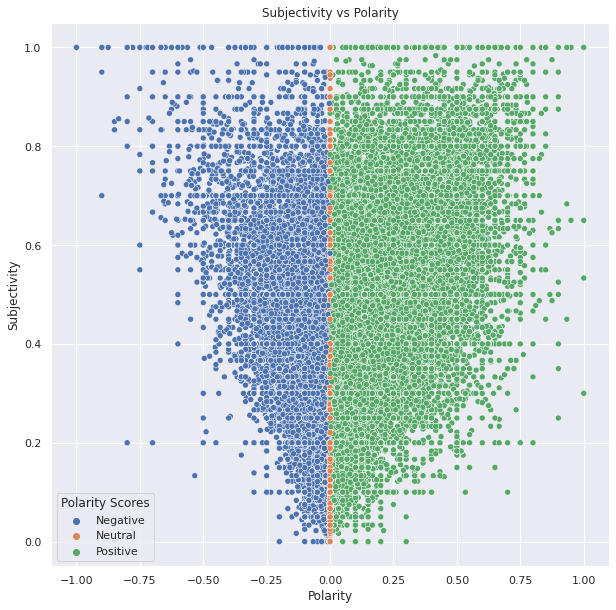

In [ ]:
# Change the datatype as "category"
tweets_processed["Polarity Scores"] = tweets_processed["Polarity Scores"].astype("category")
# Visualize the Label counts
sns.countplot(tweets_processed["Polarity Scores"])
plt.title("Label Counts")
plt.show()
# Visualize the Polarity scores
plt.figure(figsize = (10, 10)) 
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Polarity Scores", data=tweets_processed)
plt.title("Subjectivity vs Polarity")
plt.show()

**Here we have display positive and negative tweets by sorting accordingly with polarity , retweet count , favorities in order to see most popular positive and negative tweets.**

In [ ]:
# Display the positive tweets
display(tweets_processed.sort_values(by=["Polarity", "Retweet-Count", "Favorites"], axis=0, ascending=False)[["Content","Retweet-Count","Favorites","Polarity"]].head(20))

# Display the negative tweets
display(tweets_processed.sort_values(by=["Polarity", "Retweet-Count", "Favorites"], axis=0, ascending=[True, False, False])[["Content","Retweet-Count","Favorites","Polarity"]].head(20))


,Content,Retweet-Count,Favorites,Polarity
135874,Some awesome tips for teaching online via @kas...,66.0,134,1.0
132169,What works best in the classroom is what works...,60.0,146,1.0
41026,Are you looking to start your gift or surpris...,42.0,39,1.0
131850,The #DistanceLearning Playbook book clubs with...,35.0,102,1.0
135234,I want best online teaching techniques and I w...,34.0,214,1.0
80726,This could've been a perfect opportunity to re...,32.0,43,1.0
103795,"In preparation for the upcoming school year, @...",31.0,39,1.0
29594,Learning Never Exhausts the Mind! Do you know ...,31.0,118,1.0
10633,Yes! I am making #STEM #STEAM kits for 786 Ss ...,24.0,245,1.0
139232,@AndreaHorwath @ESL_fairy @fordnation The “bes...,20.0,79,1.0


,Content,Retweet-Count,Favorites,Polarity
112383,I’m horrible at remembering to do online assig...,28.0,66,-1.0
130553,Exams bhi leni hai... \nDuty bhi karvani hai.....,24.0,44,-1.0
45773,I made doodles of @ATiredShota’s mcyt apoc au ...,12.0,218,-1.0
106044,#WednesdayWisdom 5 Reasons to Be Optimistic Ab...,8.0,9,-1.0
23640,"I want job tog. Ondahala iilonga aaholike,. T...",2.0,47,-1.0
62119,Online class is boring and all until one of yo...,2.0,41,-1.0
44731,"For LPU students, Nothing change\n\n~Same bori...",2.0,3,-1.0
45868,online class is soOO0 BORING,2.0,20,-1.0
11692,Teachers and administrators — even clerks and ...,2.0,2,-1.0
25802,Bravo to Chair Snively and Vice Chair for gett...,1.0,4,-1.0


**we created word cloud to positive and negative tweets. And we can see common words used in positive and negative tweets**


In [ ]:
!pip install wordcloud

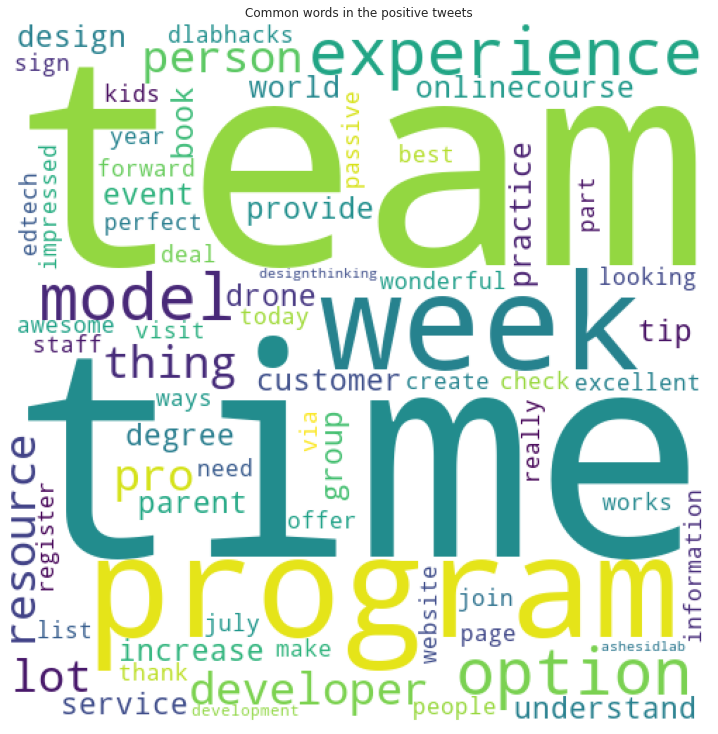

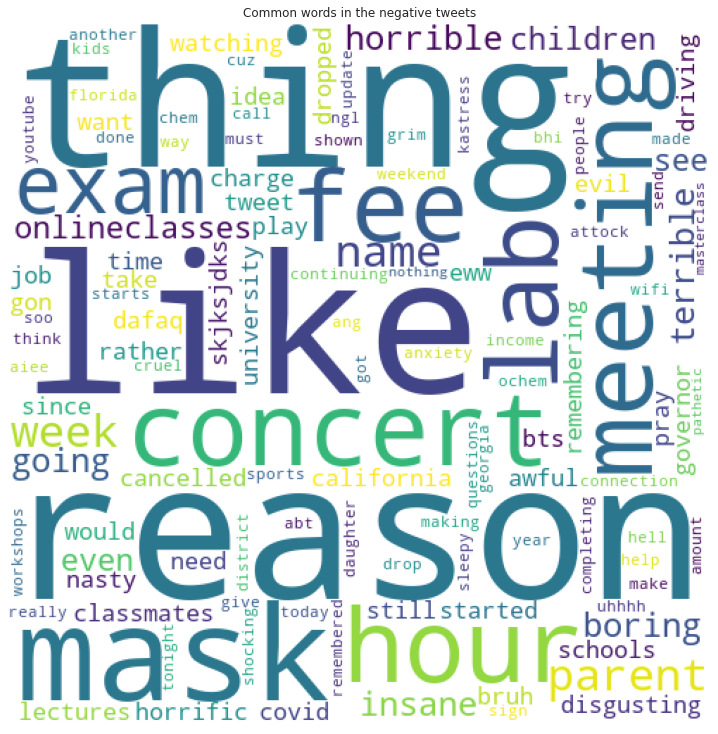

In [ ]:
from wordcloud import WordCloud

def make_wordcloud(data, label):

    # Initialize a Tf-idf Vectorizer
    polarity_vectorizer = TfidfVectorizer(max_features=5000, stop_words= tfidf_stops)

    # Fit and transform the vectorizer
    tfidf_matrix_polarity = polarity_vectorizer.fit_transform(data["Processed"])

    # Create a new DataFrame called frequencies
    frequencies_polarity = pd.DataFrame(tfidf_matrix_polarity.sum(axis=0).T,index=polarity_vectorizer.get_feature_names(),columns=['total frequency'])

    # Sort the words by frequency
    frequencies_polarity.sort_values(by='total frequency',ascending=False, inplace=True)

    # Join the indexes
    frequent_words_polarity = " ".join(frequencies_polarity.index)+" "

    # Initialize the word cloud
    wc = WordCloud(width = 500, height = 500, min_font_size = 10, max_words=2000, background_color ='white', stopwords= tfidf_stops)

    # Generate the world clouds for each type of label
    tweets_polarity = wc.generate(frequent_words_polarity)

    # Plot the world cloud                     
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(tweets_polarity) 
    plt.axis("off") 
    plt.title("Common words in the " + label +" tweets")
    plt.tight_layout(pad = 0) 
    plt.show() 

# Create DataFrames for each label
positive_popular_df = tweets_processed.sort_values(by=["Polarity","Favorites","Retweet-Count", ], axis=0, ascending=[False, False, False])[["Content","Retweet-Count","Favorites","Polarity","Processed"]].head(100)
negative_popular_df = tweets_processed.sort_values(by=["Polarity", "Favorites", "Retweet-Count"], axis=0, ascending=[True, False, False])[["Content","Retweet-Count","Favorites","Polarity","Processed"]].head(100)

# Call the function
make_wordcloud(positive_popular_df, "positive")
make_wordcloud(negative_popular_df, "negative")

**In the following code fragment we get county wise positive and negative tweets**

Positive 

Country
US    1319
GB     227
IN     177
CA     126
ES      88
      ... 
AT       1
AR       1
AL       1
AG       1
SN       1
Name: Country, Length: 95, dtype: int64

Negative

Country
US    3343
GB    1424
ZA    1187
IN     897
CA     461
      ... 
BM       1
BJ       1
AQ       1
AG       1
YE       1
Name: Country, Length: 128, dtype: int64


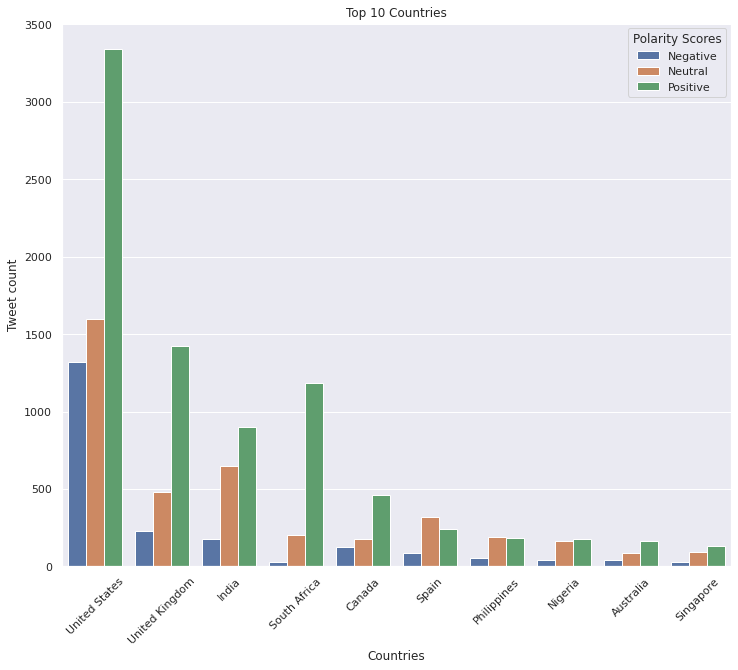

In [ ]:
# Get the positive/negative counts by country
positives_by_country = tweets_processed[tweets_processed.Country!='unknown'].groupby("Polarity Scores")["Country"].value_counts().Negative.sort_values(ascending=False)
negatives_by_country =tweets_processed[tweets_processed.Country!='unknown'].groupby("Polarity Scores")["Country"].value_counts().Positive.sort_values(ascending=False)

# Print them out
print("Positive \n")
print(positives_by_country)
print("\nNegative\n")
print(negatives_by_country)

# Create a mask for top 1 countries (by tweets count)
mask = tweets_processed["Country"].isin(top_countries.index[:10]).values

# Create a new DataFrame only includes top10 country
top_20df = tweets_processed.iloc[mask,:]

# Visualize the top 20 countries
plt.figure(figsize=(12,10))
sns.countplot(x="Country", hue="Polarity Scores", data=top_20df, order=top_20df["Country"].value_counts().index)
plt.xlabel("Countries")
locs, labels = plt.xticks()
plt.xticks(locs, country_fullnames[:10])
plt.xticks(rotation=45)
plt.ylabel("Tweet count")
plt.title("Top 10 Countries")
plt.show()

**These show that there is no relationship between time and polarity. But there it shows same trend between positive and negative polarities**

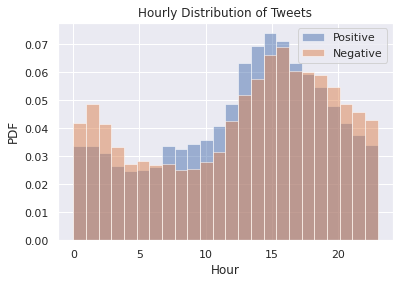

In [ ]:
tweets_processed['Created at'] = pd.to_datetime(tweets_processed['Created at'], errors='coerce')

positive = tweets_processed.loc[tweets_processed["Polarity Scores"]=="Positive"]["Created at"].dt.hour
negative = tweets_processed.loc[tweets_processed["Polarity Scores"]=="Negative"]["Created at"].dt.hour

plt.hist(positive, alpha=0.5, bins=24, label="Positive", density=True)
plt.hist(negative, alpha=0.5, bins=24, label="Negative", density=True)
plt.xlabel("Hour")
plt.ylabel("PDF")
plt.title("Hourly Distribution of Tweets")
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Save the DataFrame
tweets_processed.to_csv("tweets_sentiments.csv")

# Buid a Machine Learning model

In [ ]:
!pip install scikit-learn

Feature coding for the polarity scores

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
tweets_processed["Label_enc"] = le.fit_transform(tweets_processed["Polarity Scores"])

# Display the encoded labels
display(tweets_processed[["Label_enc"]].head())

# Select the features and the target
X = tweets_processed['Processed']
y = tweets_processed["Label_enc"]

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())

# Create the tf-idf vectorizer
model_vectorizer = TfidfVectorizer()

# First fit the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

# Initialize the Bernoulli Naive Bayes classifier
nb = BernoulliNB()

# Fit the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
best_accuracy = cross_val_score(nb, tfidf_test, y_test, cv=10, scoring='accuracy').max()
print("Accuracy:",best_accuracy)